# Librerias

In [1]:
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""datos faltantes"""
import missingno as msno
"""imputacion de datos"""
from sklearn.impute import SimpleImputer

# Funciones

In [2]:
"""funcion para eliminar datos innecesarios"""
def eliminar_filasvaloresDesconocidos(_daframe:pd.DataFrame, _dfilasConsulta:pd.DataFrame):
    filas_eliminar=[]
    for index, fila in _dfilasConsulta.iterrows():
        filas_eliminar.append(index)
        """eliminar registros de filas almacenados """
    _daframe.drop(filas_eliminar, axis=0, inplace=True)

# Importacion de datos

In [3]:
df_bot1 = pd.read_csv('../../botCTUltima/botnet-capture-20110815-fast-flux.csv')
df_bot2 = pd.read_csv('../../botCTUltima/botnet-capture-20110815-fast-flux-2.csv')

In [4]:
df_bot = pd.concat([df_bot1,df_bot2],axis=0)

# 1. Limpieza de datos

## 1.1 Eliminar datos innecesarios

#### Caracteristicas

In [5]:
"""definir caractericticas innecesarias"""
caracteristicas_in=['SrcId','Rank','Trans','sDSb','dDSb','sIpId','dIpId','SrcGap','DstGap','dsPkts','ddPkts','dsBytes',
'ddBytes','pdsPkt','pddPkt','pdsByte','pddByte','(null)','SrcWin','DstWin','JDelay','LDelay','Bins','Bin', 'SrcTCPBase','DstTCPBase'
,'Inode','sPktSz','dPktSz']

In [6]:
df_bot.drop(columns=caracteristicas_in, axis=1, inplace=True)

In [7]:
df_bot.shape

(41488, 93)

#### Protocolos

In [8]:
"""verificiar protocolos para trafico botnet"""
df_bot.Proto.unique()

array(['man', 'arp', 'udp', 'tcp', 'igmp', 'icmp'], dtype=object)

In [10]:
df_bot.Proto.value_counts()

tcp     33649
udp      7665
icmp       98
arp        68
man         4
igmp        4
Name: Proto, dtype: int64

In [11]:
"""analizar protocolos L3 y L4"""
df_bot[(df_bot.Proto=='tcp')| (df_bot.Proto=='udp')df_bot[(df_bot.Proto=='tcp')| (df_bot.Proto=='udp')| (df_bot.Proto=='icmp')]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
2,09:52:46.224591,09:55:14.515956,09:52:46.224591,19:00:00.000000,09:55:14.515956,19:00:00.000000,2,e,148.291367,148.291367,...,0.000000,NaN,384,101.931038,0.000000,110.0,NaN,92.0,NaN,NaN
4,09:52:47.393100,09:52:47.393107,09:52:47.393100,09:52:47.393469,09:52:47.393107,09:52:47.393469,4,e,0.000369,0.000369,...,0.000000,NaN,924,64.000000,139.000000,64.0,139.0,64.0,139.0,NaN
5,09:52:49.647225,09:52:49.647240,09:52:49.647225,09:52:49.647851,09:52:49.647240,09:52:49.647851,5,e,0.000626,0.000626,...,0.000000,NaN,1084,87.000000,503.000000,87.0,503.0,87.0,503.0,NaN
6,09:52:49.648602,09:52:49.686010,09:52:49.648602,09:52:49.656801,09:52:49.686010,09:52:49.683194,6,e s,0.037408,0.037408,...,0.000227,M s,1248,157.250000,84.333336,447.0,131.0,60.0,60.0,NaN
7,09:52:55.418331,10:09:39.037422,09:52:55.418331,19:00:00.000000,10:09:39.037422,19:00:00.000000,7,e,1003.619080,1003.619080,...,0.000000,NaN,1576,237.444443,0.000000,243.0,NaN,216.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40557,02:34:44.764772,02:34:46.073246,02:34:44.764772,02:34:44.910996,02:34:45.926898,02:34:46.073246,40305,e s,1.308474,1.308474,...,0.000000,M s,11033472,62.000000,60.000000,62.0,60.0,62.0,60.0,NaN
40558,02:34:47.068458,02:34:48.276085,02:34:47.068458,02:34:47.214633,02:34:48.129924,02:34:48.276085,40306,e s,1.207627,1.207627,...,0.000000,M s,11033776,62.000000,60.000000,62.0,60.0,62.0,60.0,NaN
40559,02:34:49.271608,02:34:50.579177,02:34:49.271608,02:34:49.417792,02:34:50.432728,02:34:50.579177,40307,e s,1.307569,1.307569,...,0.000000,M s,11034080,62.000000,60.000000,62.0,60.0,62.0,60.0,NaN
40560,02:34:51.574961,02:34:52.883027,02:34:51.574961,02:34:51.721241,02:34:52.736804,02:34:52.883027,40308,e s,1.308066,1.308066,...,0.000000,M s,11034384,62.000000,60.000000,62.0,60.0,62.0,60.0,NaN


Se elimina mantienen los protocolos UDP y TCP, debido a que el resto de protocolos como ICMP contiene pocas muestras.

In [8]:
df_bot = df_bot[(df_bot.Proto=='tcp')| (df_bot.Proto=='udp')]

In [9]:
df_bot.Proto.value_counts()

tcp    33649
udp     7665
Name: Proto, dtype: int64

#### Duracion de flujos

In [10]:
duracion = df_bot[(df_bot.RunTime==0.0) | (df_bot.Dur==0.0)]
df_bot[(df_bot.RunTime==0.0) | (df_bot.Dur==0.0)]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
54,09:55:12.264306,09:55:12.264306,09:55:12.264306,19:00:00.000000,09:55:12.264306,19:00:00.000000,54,e,0.0,0.0,...,0.0,NaN,15412,230.0,0.0,230.0,NaN,230.0,NaN,NaN
55,09:55:14.516119,09:55:14.516119,09:55:14.516119,19:00:00.000000,09:55:14.516119,19:00:00.000000,55,e,0.0,0.0,...,0.0,NaN,15524,104.0,0.0,104.0,NaN,104.0,NaN,NaN
782,10:09:28.615814,10:09:28.615814,10:09:28.615814,19:00:00.000000,10:09:28.615814,19:00:00.000000,782,e,0.0,0.0,...,0.0,NaN,238980,60.0,0.0,60.0,NaN,60.0,NaN,NaN
785,10:09:31.580457,10:09:31.580457,10:09:31.580457,19:00:00.000000,10:09:31.580457,19:00:00.000000,785,e,0.0,0.0,...,0.0,NaN,239712,60.0,0.0,60.0,NaN,60.0,NaN,NaN
20,10:19:09.878622,10:19:09.878622,10:19:09.878622,19:00:00.000000,10:19:09.878622,19:00:00.000000,20,e,0.0,0.0,...,0.0,NaN,8660,230.0,0.0,230.0,NaN,230.0,NaN,NaN
1332,10:34:22.061557,10:34:22.061557,10:34:22.061557,19:00:00.000000,10:34:22.061557,19:00:00.000000,1332,e,0.0,0.0,...,0.0,NaN,293548,60.0,0.0,60.0,NaN,60.0,NaN,NaN
1337,10:34:25.068419,10:34:25.068419,10:34:25.068419,19:00:00.000000,10:34:25.068419,19:00:00.000000,1337,e,0.0,0.0,...,0.0,NaN,294792,60.0,0.0,60.0,NaN,60.0,NaN,NaN
3127,10:54:05.623136,10:54:05.623136,10:54:05.623136,19:00:00.000000,10:54:05.623136,19:00:00.000000,3126,e,0.0,0.0,...,0.0,NaN,696756,60.0,0.0,60.0,NaN,60.0,NaN,NaN
3382,10:56:41.147948,10:56:41.147948,10:56:41.147948,19:00:00.000000,10:56:41.147948,19:00:00.000000,3381,e,0.0,0.0,...,0.0,NaN,754952,60.0,0.0,60.0,NaN,60.0,NaN,NaN
4196,11:05:37.054150,11:05:37.054150,11:05:37.054150,19:00:00.000000,11:05:37.054150,19:00:00.000000,4193,e,0.0,0.0,...,0.0,NaN,937320,60.0,0.0,60.0,NaN,60.0,NaN,NaN


Por ahora se mantiene el trafico con duracion 0, aunque estas variantes no indican el tipo de trafico que genera (DoS, scan, etc)

### Eliminacion de flujos con direccion IPV6 Link-Local

No hay link-Local

In [12]:
df_bot.SrcAddr.unique()

array(['147.32.84.165', '147.32.84.171', '178.123.248.251',
       '203.106.50.35', '178.122.115.200', '147.32.84.79',
       '178.122.89.175', '178.124.94.49', '147.32.96.45', '178.122.22.89',
       '178.122.247.101', '62.244.113.242', '178.123.23.184',
       '112.90.144.2', '90.177.113.3', '188.244.34.2', '96.16.227.191',
       '95.66.129.140', '221.204.203.59', '69.163.37.208',
       '58.221.42.172', '58.221.28.5', '114.255.40.2', '93.84.115.184',
       '38.229.1.13', '209.173.182.133', '157.55.192.91',
       '121.14.213.138', '174.142.207.178', '121.11.80.162',
       '218.149.54.91'], dtype=object)

## 1.2 Eliminar valores duplicados

In [13]:
df_bot.duplicated().sum()

0

## 1.3 Revisar variables Redundantes

In [14]:
df_bot.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41314 entries, 2 to 40561
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StartTime     41314 non-null  object 
 1   LastTime      41314 non-null  object 
 2   SrcStartTime  41314 non-null  object 
 3   DstStartTime  41314 non-null  object 
 4   SrcLastTime   41314 non-null  object 
 5   DstLastTime   41314 non-null  object 
 6   Seq           41314 non-null  int64  
 7   Flgs          41314 non-null  object 
 8   RunTime       41314 non-null  float64
 9   Dur           41314 non-null  float64
 10  SrcDur        41314 non-null  float64
 11  DstDur        41314 non-null  float64
 12  Mean          41314 non-null  float64
 13  StdDev        41314 non-null  float64
 14  Sum           41314 non-null  float64
 15  Min           41314 non-null  float64
 16  Max           41314 non-null  float64
 17  Dir           41314 non-null  object 
 18  SrcAddr       41314 non-nu

In [16]:
"""caracteristicas relacionadas con temporarizadores de flujo"""
df_bot.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15,16]]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max
2,09:52:46.224591,09:55:14.515956,09:52:46.224591,19:00:00.000000,09:55:14.515956,19:00:00.000000,148.291367,148.291367,148.291367,0.000000,148.291367,0.0,148.291367,148.291367,148.291367
4,09:52:47.393100,09:52:47.393107,09:52:47.393100,09:52:47.393469,09:52:47.393107,09:52:47.393469,0.000369,0.000369,0.000007,0.000000,0.000369,0.0,0.000369,0.000369,0.000369
5,09:52:49.647225,09:52:49.647240,09:52:49.647225,09:52:49.647851,09:52:49.647240,09:52:49.647851,0.000626,0.000626,0.000015,0.000000,0.000626,0.0,0.000626,0.000626,0.000626
6,09:52:49.648602,09:52:49.686010,09:52:49.648602,09:52:49.656801,09:52:49.686010,09:52:49.683194,0.037408,0.037408,0.037408,0.026393,0.037408,0.0,0.037408,0.037408,0.037408
7,09:52:55.418331,10:09:39.037422,09:52:55.418331,19:00:00.000000,10:09:39.037422,19:00:00.000000,1003.619080,1003.619080,1003.619080,0.000000,1003.619080,0.0,1003.619080,1003.619080,1003.619080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40557,02:34:44.764772,02:34:46.073246,02:34:44.764772,02:34:44.910996,02:34:45.926898,02:34:46.073246,1.308474,1.308474,1.162126,1.162250,1.308474,0.0,1.308474,1.308474,1.308474
40558,02:34:47.068458,02:34:48.276085,02:34:47.068458,02:34:47.214633,02:34:48.129924,02:34:48.276085,1.207627,1.207627,1.061466,1.061452,1.207627,0.0,1.207627,1.207627,1.207627
40559,02:34:49.271608,02:34:50.579177,02:34:49.271608,02:34:49.417792,02:34:50.432728,02:34:50.579177,1.307569,1.307569,1.161120,1.161385,1.307569,0.0,1.307569,1.307569,1.307569
40560,02:34:51.574961,02:34:52.883027,02:34:51.574961,02:34:51.721241,02:34:52.736804,02:34:52.883027,1.308066,1.308066,1.161843,1.161786,1.308066,0.0,1.308066,1.308066,1.308066


Las caracteristicas RunTime, Dur, Mean, Sum, Min y Max, visualmente cuentan con los mismos valores. Tal vez porque por cada registro hay un solo flujo, y al existir uno solo 
el valor de la duracion es valor de las demas caracteristicas mencionadas.

In [18]:
"""comprobar si todas las filas tienen el mismo valor del primero en el tiempo, si imprime True entonces hay valores distintos"""
for fila in df_bot.iloc[:,[8,9,12,14,15,16]].values:
    for col in range(6):
        if fila[0] != fila[col]:
            print(True)

## 1.4 Eliminacion por seleccion de caracteristicas

Se eliminan caracteristicas de forma directa, analizando cada una y segun la escala considerada inicialmente (ALTO, MEDIO, BAJO).

In [19]:
caracteristicas_eldir = ['StartTime', 'LastTime','SrcStartTime','DstStartTime','SrcLastTime',
'DstLastTime', 'Seq','Flgs','SrcAddr','DstAddr','Sport','sTos','dTos','sTtl','dTtl','PCRatio','TcpOpt','Cause','State','Dir']

In [20]:
df_bot.drop(columns=caracteristicas_eldir, axis=1, inplace=True)

In [21]:
df_bot.shape

(41314, 73)

# 2. Tratamiento de valores faltantes

<AxesSubplot: >

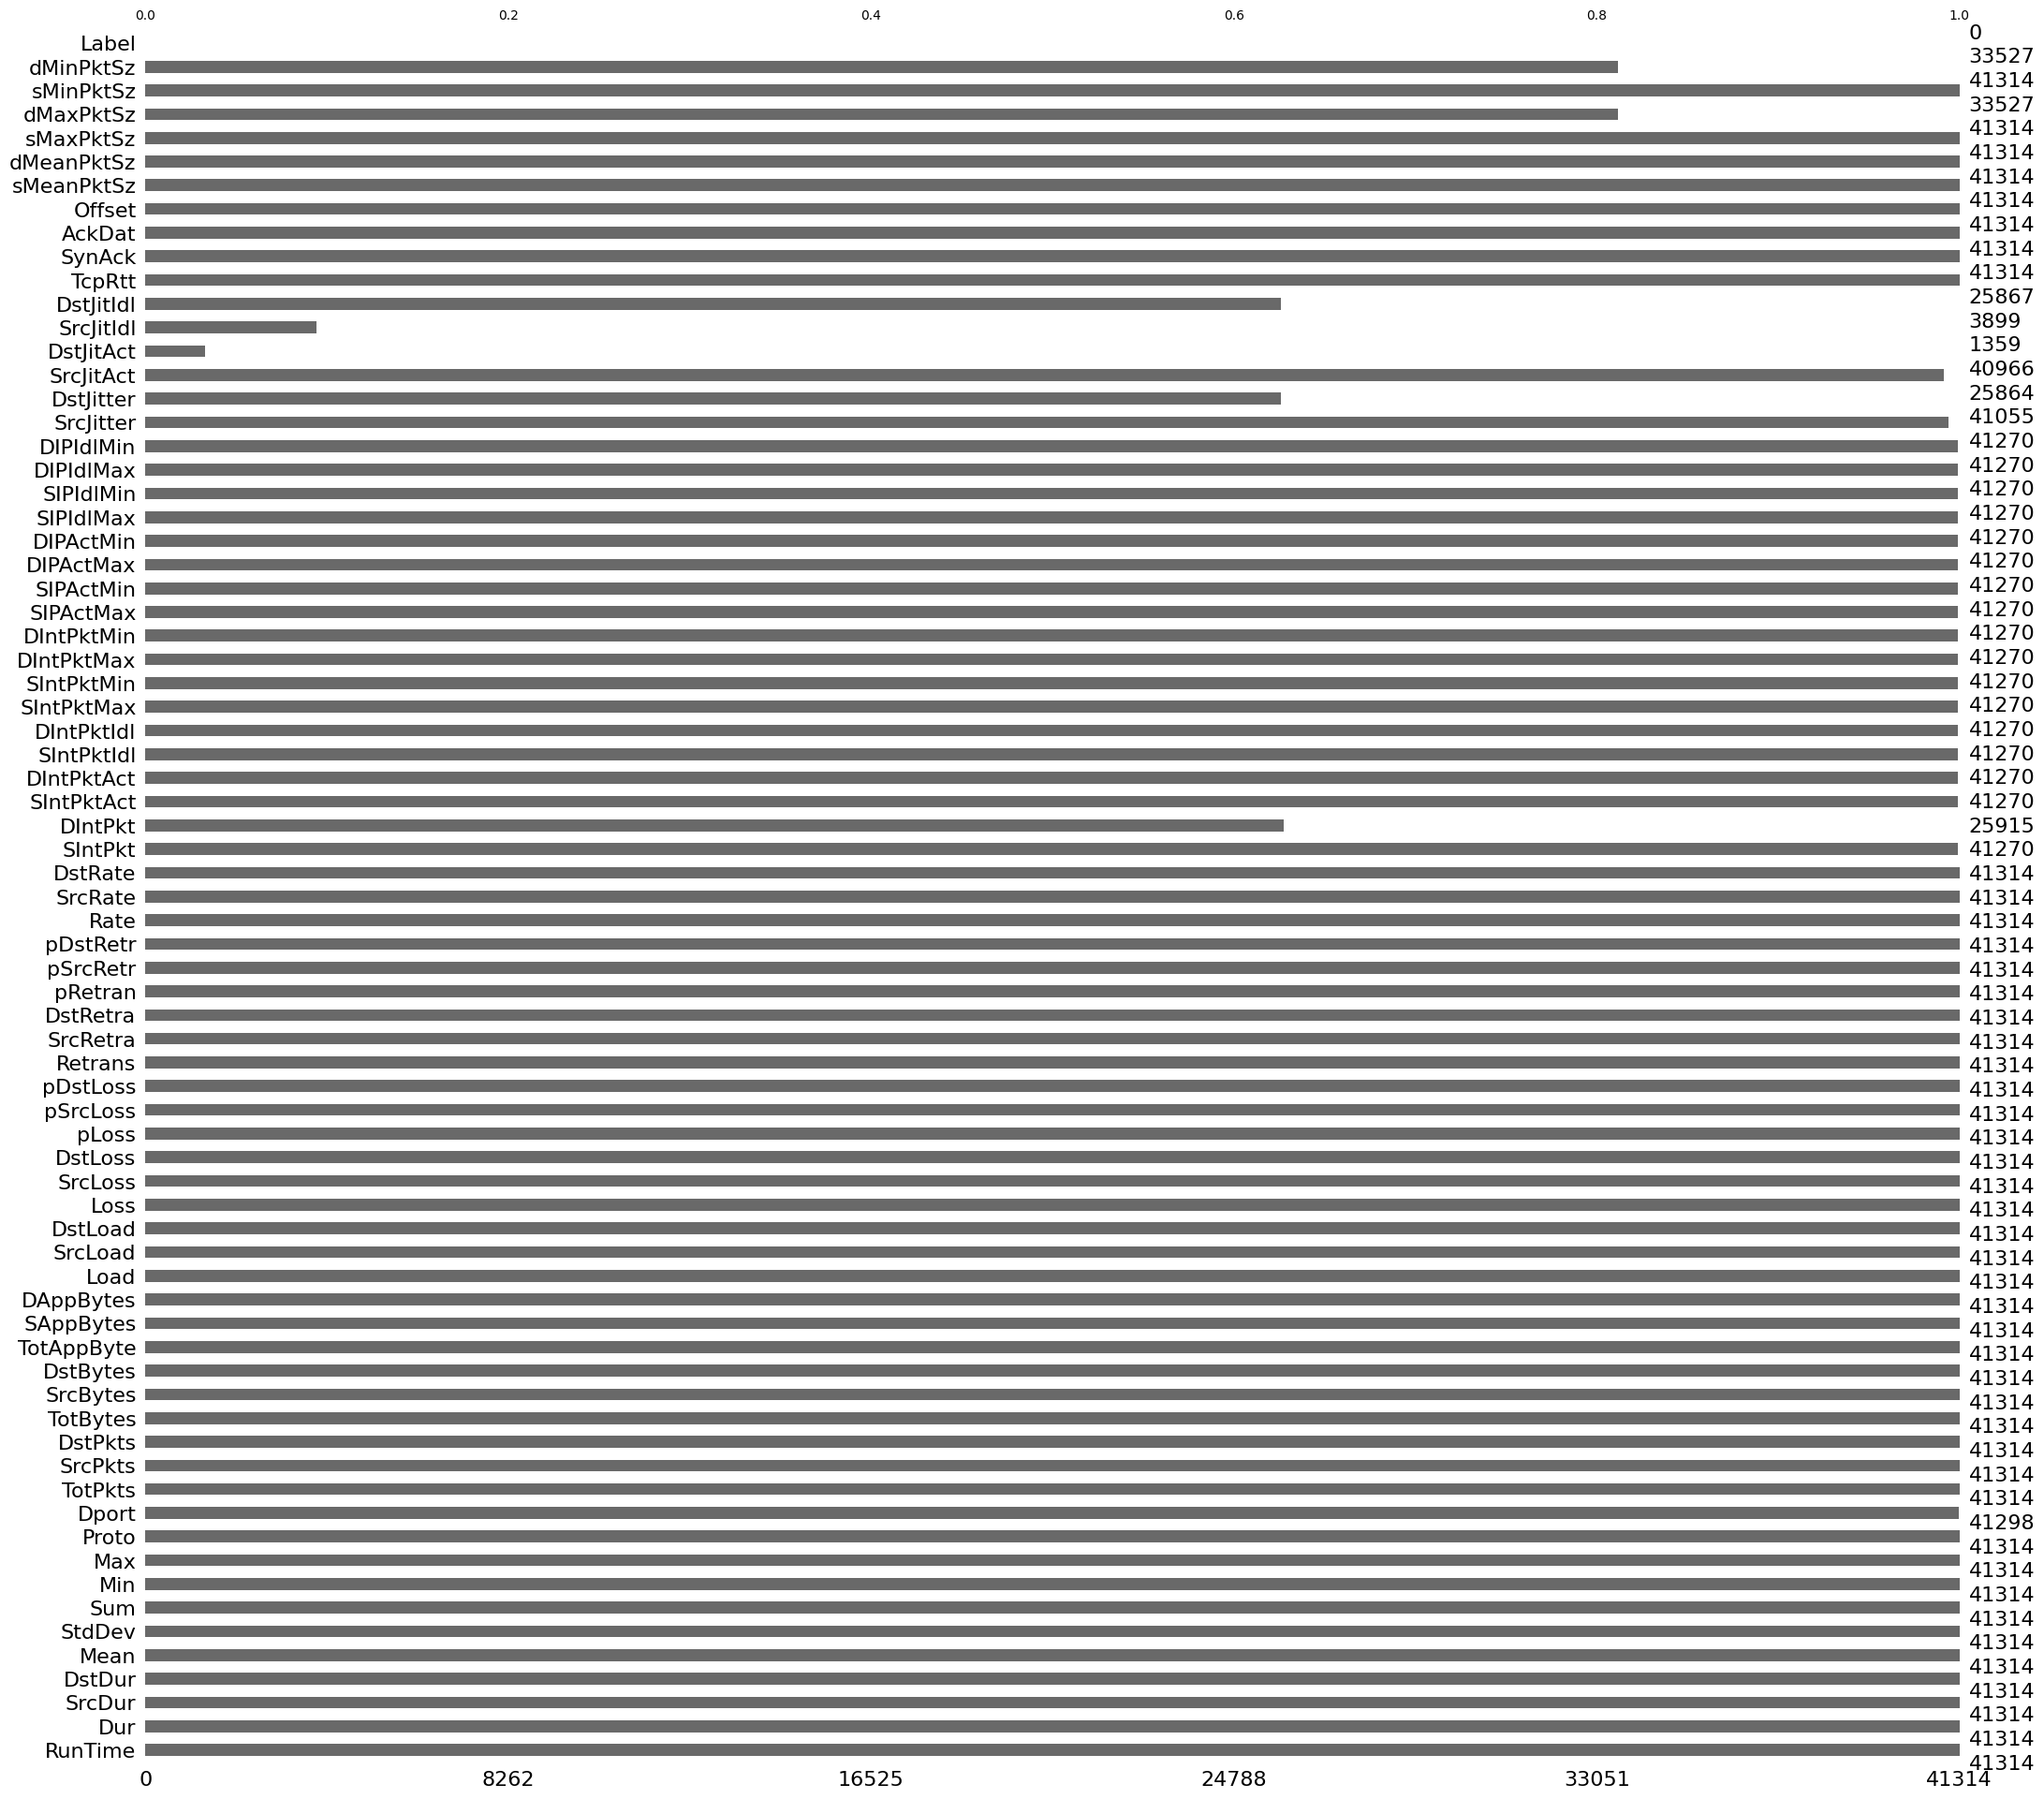

In [24]:
msno.bar(df_bot)

En este los atributos basados en actividad de paquetes y fluctuacion se encuentran con datos tratables para aplicar tecnicas de imputacion. Sin embargo al tener esta con la mayor cantidad de datos sin faltantes, a diferencia de la clase probe y normal, se procede a eliminar estas caracteristicas para tener la misma dimension. Ademas, la etiqueta aun no ha sido asignada.

#### Eliminar valores faltantes y caracteristicas que no permanecieron en las otras clases

In [25]:
df_bot.Label="botnet"

In [26]:
"""caracteristicas con datos faltantes muy elevados"""
faltantes=['SIntPkt','DIntPkt','SIntPktAct','DIntPktAct','SIntPktIdl','DIntPktIdl',
'SIntPktMax','SIntPktMin','DIntPktMax','DIntPktMin','SIPActMax'
,'SIPActMin','DIPActMax','DIPActMin','SIPIdlMax','SIPIdlMin','DIPIdlMax','DIPIdlMin'
,'SrcJitter','DstJitter','SrcJitAct','DstJitAct','SrcJitIdl','DstJitIdl']

In [27]:
df_bot.drop(columns=faltantes, axis=1, inplace=True)

<AxesSubplot: >

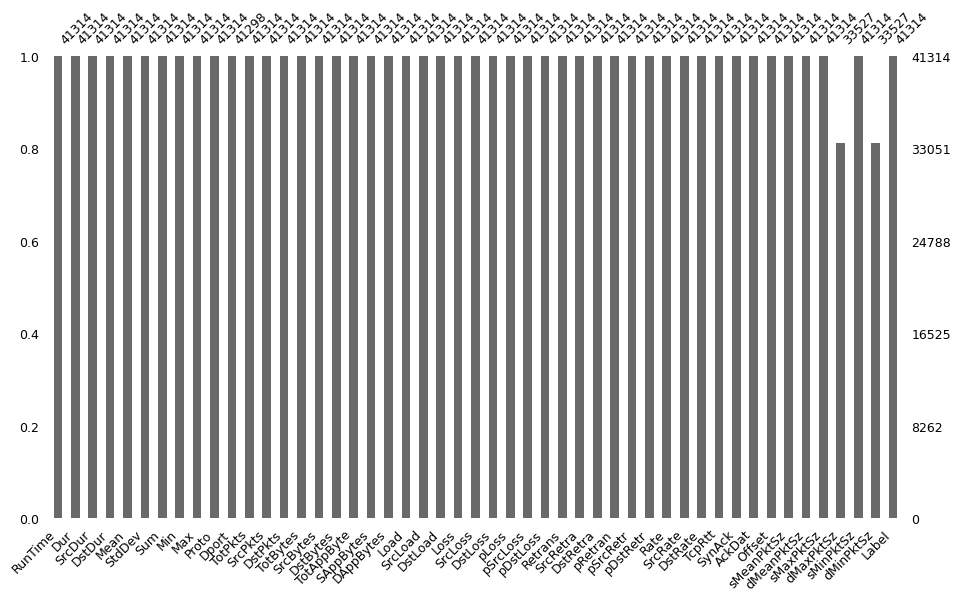

In [28]:
msno.bar(df_bot, figsize=(11,6), fontsize=9)

#### Imputacion de datos faltantes
Se analizar la cantidad de paquetes, bytes por destino y origen, asi como el promedio, el minimo y maximo del tamaño de paquetes.

In [29]:
im_sd_maxminpktz=SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0.0)
im_sd_maxminpktz=im_sd_maxminpktz.fit(df_bot[['dMaxPktSz']])
df_bot['dMaxPktSz'] = im_sd_maxminpktz.transform(df_bot[['dMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_bot[['dMinPktSz']])
df_bot['dMinPktSz'] = im_sd_maxminpktz.transform(df_bot[['dMinPktSz']])

In [50]:
df_bot = df_bot[df_bot['Dport'].notna()]

<AxesSubplot: >

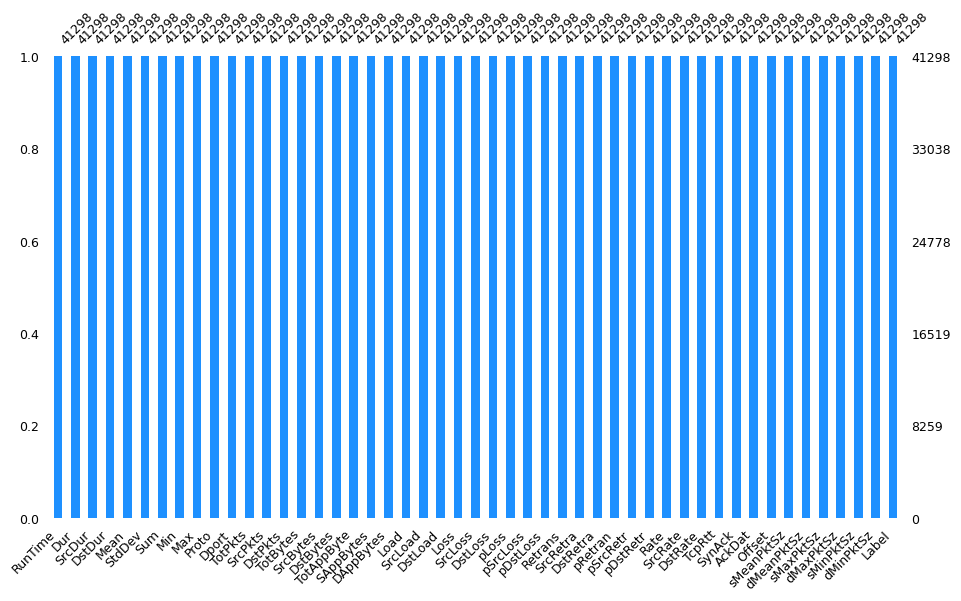

In [51]:
msno.bar(df_bot, figsize=(11,6), fontsize=9, color="dodgerblue")

# 3. Valores atípicos
Se analizan posibles valores atípicos

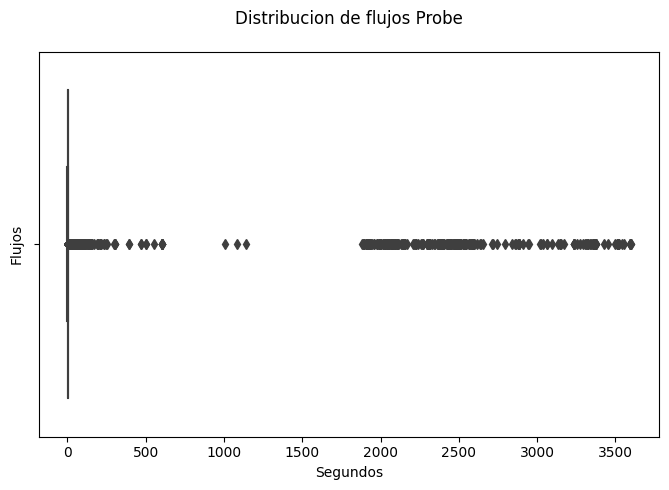

In [52]:
"""crear boxplot"""
plt.subplots(figsize=(8, 5))
ax = sns.boxplot(x = df_bot.Dur)
ax.set_xlabel("Segundos", fontsize = 10)
ax.set_ylabel("Flujos", fontsize = 10)
ax.set_title("Distribucion de flujos Probe", fontsize =12, pad = 20)
plt.show()

In [32]:
df_bot.describe()

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,TotPkts,...,TcpRtt,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz
count,41314.000000,41314.000000,41314.000000,41314.000000,41314.000000,41314.0,41314.000000,41314.000000,41314.000000,41314.000000,...,41314.000000,41314.000000,41314.000000,4.131400e+04,41314.000000,41314.000000,41314.000000,41314.000000,41314.000000,41314.000000
mean,22.409457,22.409457,22.301294,17.470641,22.409457,0.0,22.409457,22.409457,22.409457,11.690783,...,0.009414,0.009124,0.000290,5.080904e+06,80.659990,140.933946,127.004938,261.892192,64.521470,91.201990
std,218.275769,218.275769,218.281572,201.203537,218.275769,0.0,218.275769,218.275769,218.275769,28.798529,...,0.071810,0.071524,0.006444,3.300856e+06,95.037066,303.654521,242.048369,823.830134,7.728083,111.724133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.280000e+02,60.000000,0.000000,60.000000,0.000000,60.000000,0.000000
25%,1.306712,1.306712,1.160457,0.000000,1.306712,0.0,1.306712,1.306712,1.306712,6.000000,...,0.000000,0.000000,0.000000,2.107000e+06,62.000000,60.000000,62.000000,60.000000,62.000000,60.000000
50%,1.307855,1.307855,1.161578,1.161001,1.307855,0.0,1.307855,1.307855,1.307855,9.000000,...,0.000000,0.000000,0.000000,4.890024e+06,62.000000,60.000000,62.000000,60.000000,62.000000,60.000000
75%,2.460716,2.460716,2.352082,1.161684,2.460716,0.0,2.460716,2.460716,2.460716,9.000000,...,0.000000,0.000000,0.000000,7.964844e+06,69.000000,130.000000,69.000000,148.000000,62.000000,60.000000
max,3599.847412,3599.847412,3599.847412,3555.021484,3599.847412,0.0,3599.847412,3599.847412,3599.847412,1110.000000,...,9.705542,9.705282,0.158583,1.103469e+07,1399.685547,5030.750000,1514.000000,13194.000000,456.000000,553.000000


El valor minimo del trafico es de 0 segundos y el maximo es de 3599 segundos. El promerdio de los flujos es de un 1.30 segundos. El rango comun de segundos se encuentra entre el 2do y 3er cuartil, es decir, con 1.30 y 2.46 segundos.

In [53]:
df_bot.to_csv('../../araDataFin/limpieza_fase2/limpieza_botnet_3ValoresAtipicos.csv',index=False)

Solo existe trafico con protocolos UDP y TCP y duracion 0.

# 4. Codificacion de etiquetas

In [2]:
df_bot = pd.read_csv('../../araDataFin/limpieza_fase2/limpieza_botnet_3ValoresAtipicos.csv', low_memory=False)

#### Codificar Protocolos

In [3]:
df_bot.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41298 entries, 0 to 41297
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     41298 non-null  float64
 1   Dur         41298 non-null  float64
 2   SrcDur      41298 non-null  float64
 3   DstDur      41298 non-null  float64
 4   Mean        41298 non-null  float64
 5   StdDev      41298 non-null  float64
 6   Sum         41298 non-null  float64
 7   Min         41298 non-null  float64
 8   Max         41298 non-null  float64
 9   Proto       41298 non-null  int64  
 10  Dport       41298 non-null  object 
 11  TotPkts     41298 non-null  int64  
 12  SrcPkts     41298 non-null  int64  
 13  DstPkts     41298 non-null  int64  
 14  TotBytes    41298 non-null  int64  
 15  SrcBytes    41298 non-null  int64  
 16  DstBytes    41298 non-null  int64  
 17  TotAppByte  41298 non-null  int64  
 18  SAppBytes   41298 non-null  int64  
 19  DAppBytes   41298 non-nul

Atributos no numericos: Proto(ordinal), Dport(ordinal), Label(ordinal-nominal)

In [ ]:
df_bot.Proto.replace({'tcp':6, 'udp':17},inplace=True )

In [4]:
df_bot.Proto.unique()

array([17,  6], dtype=int64)

#### Codificando Puertos

In [5]:
df_bot.Dport.unique()

array(['netbios-ns', 'domain', 'http', 'netbios-dgm', '1900', '2012',
       '3128', 'netbios-ssn', 'ircd', 'smtp', '65500', 'https',
       'kerberos', 'submission', '2107', '43744', '888', '2427', 'snmp',
       '4352', '4627', '1535', 'ftp', '4502', '1292', '1653', 'ssh',
       '1230', '2349', '82', '81', '5900', '2114', 'ms-wbt-server',
       '2011', 'radmin-port', 'sip', 'ms-sql-s', 'ntp', '27977', '8000',
       'http-alt', '2967'], dtype=object)

In [6]:
df_bot.Dport.replace({'netbios-ns': 137, 'domain':53,'http':80,'netbios-dgm':138, 'netbios-ssn':139 ,'ircd':6667, 'smtp':25, 'https':443, 
'kerberos': 88, 'submission':587 ,'snmp': 161, 'ftp':21, 'ssh':22, 'ms-wbt-server':3389, 'radmin-port':4899, 'sip':5060, 'ms-sql-s':1433, 'ntp':123,
'http-alt':591},inplace=True )

In [12]:
df_bot.Dport.unique()

array([137, 53, 80, 138, '1900', '2012', '3128', 139, 6667, 25, '65500',
       443, 88, 587, '2107', '43744', '888', '2427', 161, '4352', '4627',
       '1535', 21, '4502', '1292', '1653', 22, '1230', '2349', '82', '81',
       '5900', '2114', 3389, '2011', 4899, 5060, 1433, 123, '27977',
       '8000', 591, '2967'], dtype=object)

In [15]:
df_bot.Dport.replace({'1900':1900, '2012':2012, '3128':3128, '65500':65500, '2107':2107, '43744':43744, '888':888, '2427':2427, '4352':4352,'4627':4627,
'1535':1535, '4502':4502, '1292':1292, '1653':1653, '1230':1230, '2349':2349, '82':82, '81':81, '5900':5900, '2114':2114, '2011':2011, '27977':27977, '8000':8000,
'2967':2967},inplace=True )

In [16]:
df_bot.Dport.unique()

array([  137,    53,    80,   138,  1900,  2012,  3128,   139,  6667,
          25, 65500,   443,    88,   587,  2107, 43744,   888,  2427,
         161,  4352,  4627,  1535,    21,  4502,  1292,  1653,    22,
        1230,  2349,    82,    81,  5900,  2114,  3389,  2011,  4899,
        5060,  1433,   123, 27977,  8000,   591,  2967], dtype=int64)

In [17]:
df_bot.Dport.value_counts()

443      22128
53        7575
25        6636
80        2307
6667      1133
65500      846
21         183
587        159
3389        72
3128        61
137         32
888         30
139         29
138         20
161         16
88          12
43744       10
1433         5
2012         3
1900         3
81           3
2349         2
27977        2
4899         2
2011         2
2114         2
82           2
1535         2
1230         2
1653         2
1292         2
4502         2
2427         2
2107         2
22           1
5900         1
4627         1
4352         1
5060         1
123          1
8000         1
591          1
2967         1
Name: Dport, dtype: int64

#### Codificar etiqueta Label

No se realiza la codificacion de esta etiqueta, se realizara al momento de concatenar todas las clases.



Se procede a guardar los datos ya codificados.

In [20]:
df_bot.shape

(41298, 49)

In [19]:
df_bot.to_csv('../../araDataFin/limpieza_fase2/botnet_4.csv',index=False)